<a href="https://colab.research.google.com/github/ugurtegin/Nonlinear_MMF_Network/blob/main/NoExp/ImageAgePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import tensorflow as tf

from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Activation, LSTM
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D 
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import scipy.io as sio
import h5py

f = sio.loadmat('/content/drive/My Drive/Research/WO_Res/AgePredict/imgs.mat')
inp = f['imgs']


f2 = sio.loadmat('/content/drive/My Drive/Research/WO_Res/AgePredict/label.mat')
out = f2['label']


In [19]:
datasize = len(np.transpose(inp))

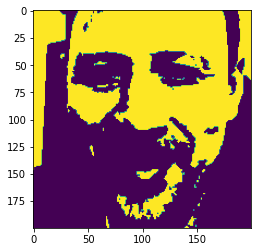

In [20]:
plt.imshow(np.squeeze(inp[0,]))
plt.show()

In [31]:
zbam = out.T
out = zbam/np.max(zbam)

In [32]:
input_data =  np.expand_dims(inp, -1)
output_data = out

print('input_data : ', input_data.shape, input_data.dtype)
print('output_class : ', output_data.shape, output_data.dtype)
print()

input_data :  (3000, 200, 200, 1) uint8
output_class :  (3000, 1) float64



In [33]:
oran = 0.20
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=oran)

print('Test data : ', X_test.shape, X_test.dtype)
print('Training data : ', X_train.shape, X_train.dtype)
print()

Test data :  (600, 200, 200, 1) uint8
Training data :  (2400, 200, 200, 1) uint8



In [47]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='linear'))

In [48]:
loss='mean_squared_error' # mean_absolute_error, cosine_proximity
metrics = ['mean_squared_error']  # network accuracy metric to be determined after each epoch, mean_absolute_error, cosine_proximity

opt1 = SGD(lr=0.001, momentum=0.9)
opt2 = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt2, loss=loss, metrics=metrics)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 196, 196, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 294912)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [49]:
#setting final parameters for the network and it begins to train
number_of_iterations = 20
batch_size = 32

#history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=number_of_iterations)
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=number_of_iterations, verbose=0, validation_data=(X_test, y_test))
#Number of iterations run: 900

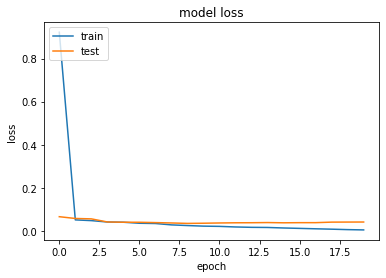

In [50]:
from google.colab import files
ls=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
ls.show()
#ls.savefig('/content/drive/My Drive/MMF_Reservoir/Stock_Intel35/loss-expset_apple.png')
#files.download('loss-1.png')

In [51]:
abit = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE ' + str(mean_squared_error(abit, y_test)))
print('RMSE ' + str(np.sqrt(mean_squared_error(abit, y_test))))

MSE 0.04050109932383133
RMSE 0.20124884924846484


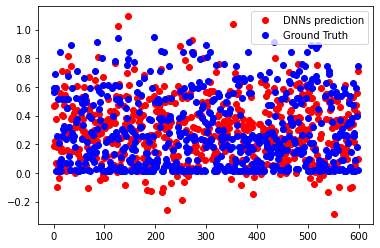

In [52]:
ls=plt.figure()
plt.plot(abit,'ro')
plt.plot(y_test,'bo')
plt.legend(['DNNs prediction', 'Ground Truth'], loc='upper right')
ls.show()
#ls.savefig('/content/drive/My Drive/MMF_Reservoir/Stock_Intel35/loss-expset_res_apple.png')

In [53]:
abit = model.predict(np.expand_dims(inp, -1))
from sklearn.metrics import mean_squared_error
print('MSE ' + str(mean_squared_error(abit, out)))
print('RMSE ' + str(np.sqrt(mean_squared_error(abit, out))))

MSE 0.010283797047721342
RMSE 0.10140905801614243


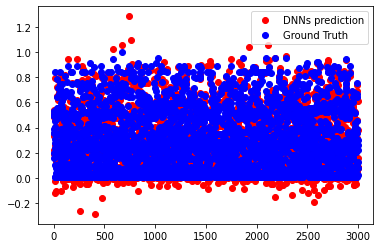

In [54]:
ls=plt.figure()
plt.plot(abit,'ro')
plt.plot(out,'bo')
plt.legend(['DNNs prediction', 'Ground Truth'], loc='upper right')
ls.show()
#ls.savefig('/content/drive/My Drive/MMF_Reservoir/Stock_Intel35/loss-expset_res_alldata_apple.png')